In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, ConfusionMatrixDisplay

In [4]:
data = pd.read_csv('IrisNew.csv')
df = pd.DataFrame(data, columns=["Sepal Length","Sepal Width","Petal Length","Petal Width","Class"])
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,4.3,3.0,1.1,0.1,setosa
1,4.4,2.9,1.4,0.2,setosa
2,4.4,3.0,1.3,0.2,setosa
3,4.4,3.2,1.3,0.2,setosa
4,4.5,2.3,1.3,0.3,setosa


In [11]:
# Splitting training data into train and test 
X = df[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']] 
Y = df[['Class']]
# setting test to 30% of the total dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=100)

y_train.head()

,Class
6,setosa
25,setosa
21,setosa
92,versicolor
9,setosa


In [28]:
def model_statistics(model, model_name):
    # Confusion Matrix
    model_probs = model.predict(X_test)
    cm = confusion_matrix(y_test, model_probs)
    classification_rep = classification_report(y_test, model_probs)
    accuracy = accuracy_score(y_test, model_probs)
    recall = recall_score(y_test, model_probs, average="macro")
    precision = precision_score(y_test, model_probs, average="macro")
    
    print(f"{model_name} Classification Report:\n {classification_rep}")
    print(f"{model_name} Accuracy:\n {accuracy}")
    print(f"{model_name} Recall: \n {recall}")
    print(f"{model_name} Precision:\n {precision}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="OrRd")
    plt.savefig(f"{model_name}.png")
    plt.show()

Decision tree with entropy Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.93      0.93      0.93        15
   virginica       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Decision tree with entropy Accuracy:
 0.9555555555555556
Decision tree with entropy Recall: 
 0.9581699346405229
Decision tree with entropy Precision:
 0.9581699346405229


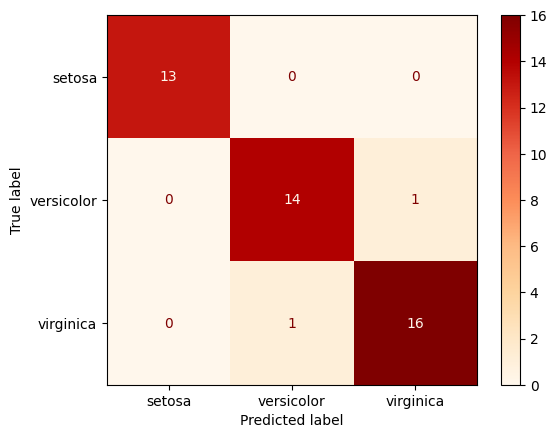

In [29]:
# Building decision tree model with entropy
dt_entropy = DecisionTreeClassifier(criterion = "entropy")
dt_entropy.fit(X_train, y_train)

model_statistics(dt_entropy, "Decision tree with entropy")

Decision tree with gini Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.93      0.93      0.93        15
   virginica       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Decision tree with gini Accuracy:
 0.9555555555555556
Decision tree with gini Recall: 
 0.9581699346405229
Decision tree with gini Precision:
 0.9581699346405229


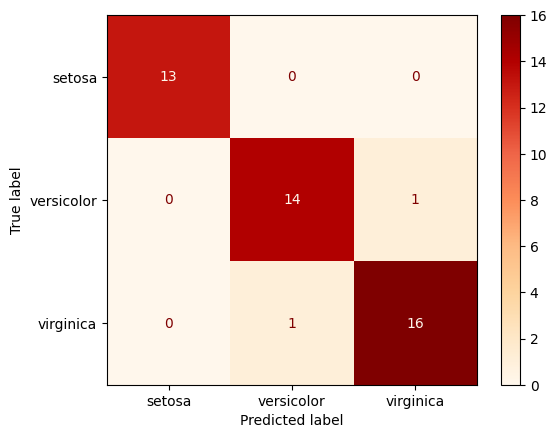

In [30]:
#Decision tree model using gini as criterion
dt_gini = DecisionTreeClassifier(criterion = "gini",random_state=42)
dt_gini.fit(X_train, y_train)

model_statistics(dt_gini, "Decision tree with gini")

C:\Users\puneeth\anaconda3\envs\808l\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Logistic Regression Accuracy:
 1.0
Logistic Regression Recall: 
 1.0
Logistic Regression Precision:
 1.0


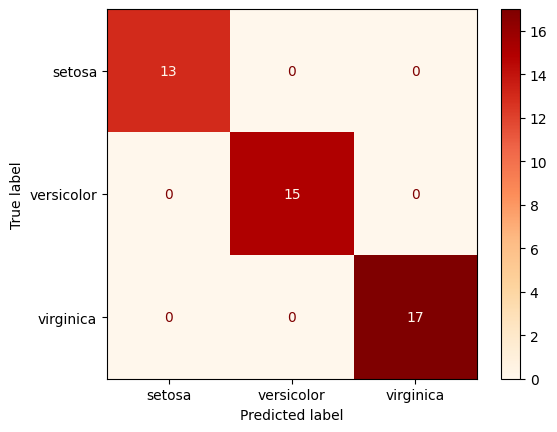

In [31]:
# Logistic Regression model
lr = LogisticRegression(penalty=None)
lr.fit(X_train, y_train)

model_statistics(lr, "Logistic Regression")

C:\Users\puneeth\anaconda3\envs\808l\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

KNN Accuracy:
 0.9777777777777777
KNN Recall: 
 0.9777777777777779
KNN Precision:
 0.9814814814814815


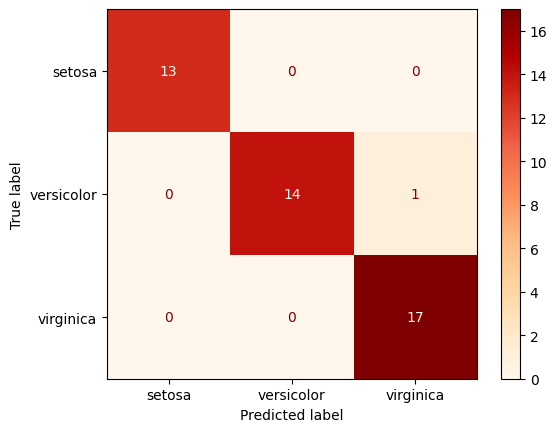

In [32]:
k = 17  
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

model_statistics(knn, "KNN")